### Vairations of Gradient Descent Optimisation

#### BGD

- Gradients are actually a vector.
- Gradient is computed over entire dataset before making an update.
- Loss decreases smoothly.
- We iterate over entire sample in one go as there is only one batch.
- 1 epoch has 1 batch.

#### SGD

- We compute the gradient over 1 training example and make an update.
- Repeat this step till we do-not update theta using every example.
- We find gradient of each example.
- Faster convergence.
- But noisy updates.
- Not able to spoil the vectorization functionality in your code.
- 1 epoch is completed when all the batches passes through 1 time from the predictive model.
  
#### Mini Batch GD

- Gradient is computed using the subset of training data before making    an update.
- I will pick the 10 examples from 100 training examples, then I will     compute theta.
- Implies in 1 epoch I will have 10 mini batches and this means theta     will be updated 10 times.
- It has More frequent updates unlike BGD, but less updates than SGD .
  
### Epoch: means "1" complete iteration of complete  training data.




### Pseudo Code

#### BGD
- for epochs in range(max_iterations):  
-      grad = gradient(X,Y)
-      theta  = theta - lr*grad

  
- Theta will update after  all the training examples go through our
predictive model , only 1 update  and 1 epoch is completed.
- Max_iterations is no. of iterations that 

### Mini Batch GD
- for epochs in range (max_itreations):
-     shuffle(data)randomly
-     for batch in all no_of_batches :
-         (x', y') = load_batch() #(x', y' aresubset of main dataset) 
-          grad    = gradient(x', y')
-          theta   = theta - lr*grad
#### No of batches = (total training examples) / batch size(no. of examples).

#### In minibatch graident updated after first subset , is used  to update our theta in next sample of subsets.

#### More updates, More amount of computation, Faster Convergence, Noisy Updates, take advantages of vectroization, avoid local minima, more robust convergence, no need to store or load entire dataset in memory
#### Noisy updates help to avoid local minima.
### convergence is more robust 
      
 
          

### Mini Batch Gradient Descent 

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.datasets import make_regression

In [6]:
X, y = make_regression(n_samples=10000, n_features=20,  n_informative= 20, noise=10,random_state=1)

In [7]:
X.shape

(10000, 20)

In [8]:
y.shape

(10000,)

In [9]:
X[0:5, 0:4] #un-normalised

array([[ 1.03229501, -1.75118546,  2.69549113,  0.1471679 ],
       [-0.87711924, -1.59460292,  0.17844181, -0.97792417],
       [ 0.66583853, -0.0754871 , -0.11572964,  0.17744407],
       [ 1.55052359, -1.43590549,  2.11218579,  1.25923994],
       [-0.43275266,  0.76950602,  0.25793019, -1.40373181]])

In [10]:
mean = np.mean(X, axis = 0)
std_deviation = np.std(X, axis = 0)
X = (X- mean)/std_deviation

In [11]:
X[0:5, 0:4]

array([[ 1.03275756, -1.76377421,  2.69585985,  0.15534676],
       [-0.90782914, -1.60671489,  0.17274091, -0.97889378],
       [ 0.66031843, -0.08297356, -0.1221399 ,  0.18586912],
       [ 1.55944656, -1.44753425,  2.11114792,  1.27646141],
       [-0.45620798,  0.76459246,  0.25242097, -1.4081638 ]])

### Adding an column of 1's for Vectorization:

In [12]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
print(X.shape)


(10000, 21)


In [13]:
def hypothesis(X, theta):
    return np.dot(X, theta)


In [14]:
def error(X, y, theta):
    e = 0.0
    m = X.shape[0]
    y_predicted = hypothesis(X, theta)
    e = np.sum((y - y_predicted)**2)
    return (e/m)

In [15]:
def gradient(X, y, theta):
    y_predicted = hypothesis(X, theta)
    grad = np.dot(X.T, (y_predicted - y))
    m = X.shape[0]
    return grad/m

In [16]:
def gradient_descent(X, y, lr = 0.01, max_iters = 300):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_iters):
        e = error(X, y, theta)
        error_list.append(e)
#Batch gradient descent -> Compute the gradient wrt to entire dataset
        grad = gradient(X, y, theta)
        theta = theta - (lr * grad)

    return theta, error_list
        

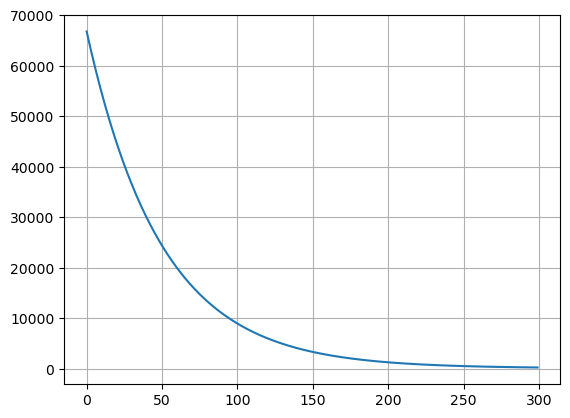

In [17]:
theta, error_list = gradient_descent(X, y)
plt.plot(np.arange(len(error_list)), error_list)
plt.grid()
plt.show()

In [18]:
y.shape

(10000,)

In [19]:
def Mini_gradient_descent(X, y, batch_size = 20, lr = 0.01, max_iters = 300):
    n = X.shape[1]
    theta = np.zeros((n,))# no. of features
    error_list = []

#Suffle the data --->> for that we have we have to merge X and Y.
    data = np.hstack((X, y.reshape(-1,1)))# stacked
    for i in range(max_iters):
        e = error(X, y, theta)
        error_list.append(e)
# Mini Batch gradient descent -> Compute the gradient wrt to entire dataset
        np.random.shuffle(data)
        no_of_examples = data.shape[0]
        total_batches = no_of_examples // batch_size
        for i in range(total_batches):
            batch_data = data[i*batch_size : (i + 1)*batch_size, :]
            x_batch = batch_data[:, : -1] # all columns expect last coulmn
            # extracting the x values from x_batch 
            y_batch = batch_data[:, -1]
            # extracting the y values from y_batch
            batch_gradient = gradient(x_batch, y_batch, theta)
            theta = theta - lr*batch_gradient

    return theta, error_list
        

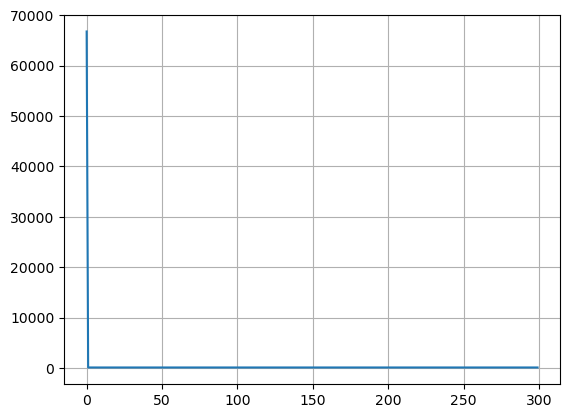

In [20]:
theta, error_list =  Mini_gradient_descent(X, y)
plt.plot(np.arange(len(error_list)), error_list)
plt.grid()
plt.show()
# multiple updates were done :
# In 1 epoch the magnitude of theta is higher regardless of BGD

In [26]:
def Mini_gradient_descent(X, y, batch_size = 20, lr = 0.01, max_iters = 10):
    n = X.shape[1]
    theta = np.zeros((n,))# no. of features
    error_list = []

#Suffle the data --->> for that we have we have to merge X and Y.
    data = np.hstack((X, y.reshape(-1,1)))# stacked
  

# Mini Batch gradient descent -> Compute the gradient wrt to entire dataset
    np.random.shuffle(data)
    no_of_examples = data.shape[0]
    total_batches = no_of_examples // batch_size
    for i in range(total_batches):
        batch_data = data[i*batch_size : (i + 1)*batch_size, :]
        x_batch = batch_data[:, : -1] # all columns expect last coulmn
            # extracting the x values from x_batch 
        y_batch = batch_data[:, -1]
            # extracting the y values from y_batch
        batch_gradient = gradient(x_batch, y_batch, theta)
        theta = theta - lr*batch_gradient
        e = error(x_batch, y_batch, theta)
        #calculating eror after each update
        error_list.append(e)

    return theta, error_list


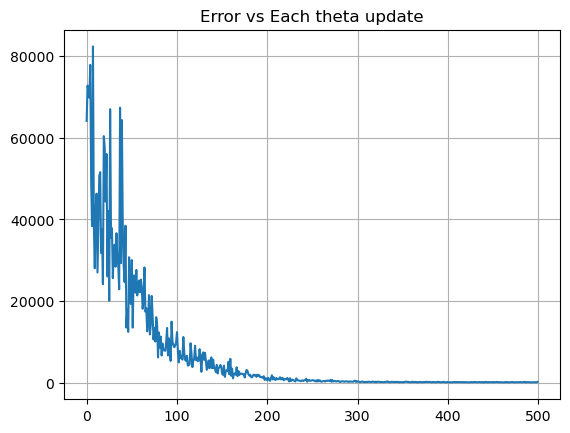

In [27]:
theta, error_list =  Mini_gradient_descent(X, y)
plt.plot(np.arange(len(error_list)), error_list)
plt.title("Error vs Each theta update")
plt.grid()
plt.show()

In [28]:
final_error = error_list[-1]
print(final_error)

176.37572754487167


In [29]:
print(error_list[0])

64148.36137367187


In [ ]:
###each update used 500 examples to update theta and  in 1 epoch we udated theta 
#20 times

In [33]:
def stocastic_gradient_descent(X, y, batch_size = 1, lr = 0.01, max_iters = 10):
    n = X.shape[1]
    theta = np.zeros((n,))# no. of features
    error_list = []

#Suffle the data --->> for that we have we have to merge X and Y.
    data = np.hstack((X, y.reshape(-1,1)))# stacked
  

# Mini Batch gradient descent -> Compute the gradient wrt to entire dataset
    np.random.shuffle(data)
    no_of_examples = data.shape[0]
    total_batches = no_of_examples // batch_size
    for i in range(total_batches):
        batch_data = data[i*batch_size : (i + 1)*batch_size, :]
        x_batch = batch_data[:, : -1] # all columns expect last coulmn
            # extracting the x values from x_batch 
        y_batch = batch_data[:, -1]
            # extracting the y values from y_batch
        batch_gradient = gradient(x_batch, y_batch, theta)
        theta = theta - lr*batch_gradient
        e = error(x_batch, y_batch, theta)
        #calculating eror after each update
        error_list.append(e)

    return theta, error_list


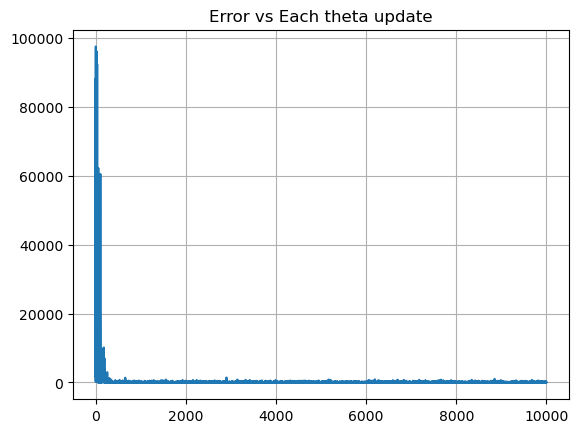

In [34]:
theta, error_list =  stocastic_gradient_descent(X, y)
plt.plot(np.arange(len(error_list)), error_list)
plt.title("Error vs Each theta update")
plt.grid()
plt.show()

In [35]:
def stocastic_gradient_descent(X, y, batch_size = 1, lr = 0.01, max_iters = 300):
    n = X.shape[1]
    theta = np.zeros((n,))# no. of features
    error_list = []

#Suffle the data --->> for that we have we have to merge X and Y.
    data = np.hstack((X, y.reshape(-1,1)))# stacked
    for i in range(max_iters):
        e = error(X, y, theta)
        error_list.append(e)
# Mini Batch gradient descent -> Compute the gradient wrt to entire dataset
        np.random.shuffle(data)
        no_of_examples = data.shape[0]
        total_batches = no_of_examples // batch_size
        for i in range(total_batches):
            batch_data = data[i*batch_size : (i + 1)*batch_size, :]
            x_batch = batch_data[:, : -1] # all columns expect last coulmn
            # extracting the x values from x_batch 
            y_batch = batch_data[:, -1]
            # extracting the y values from y_batch
            batch_gradient = gradient(x_batch, y_batch, theta)
            theta = theta - lr*batch_gradient

    return theta, error_list

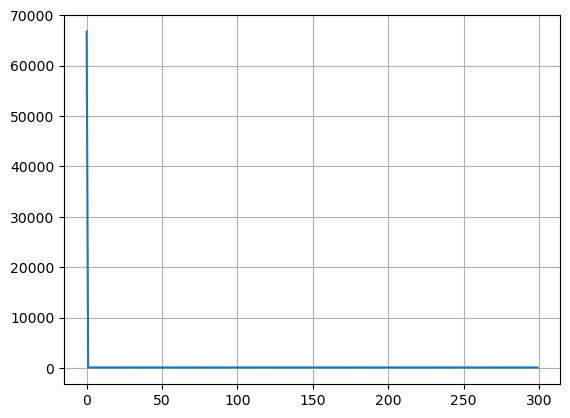

In [36]:
theta, error_list =  stocastic_gradient_descent(X, y)
plt.plot(np.arange(len(error_list)), error_list)

plt.grid()
plt.show()

In [48]:
np.hstack((X[0:5, 0:4],y[:5].reshape(-1,1)))#horizontally stack everything

array([[ 1.00000000e+00,  1.00000000e+00,  1.03275756e+00,
        -1.76377421e+00, -2.66044317e+02],
       [ 1.00000000e+00,  1.00000000e+00, -9.07829143e-01,
        -1.60671489e+00, -6.12474140e+02],
       [ 1.00000000e+00,  1.00000000e+00,  6.60318431e-01,
        -8.29735589e-02, -1.52698998e+02],
       [ 1.00000000e+00,  1.00000000e+00,  1.55944656e+00,
        -1.44753425e+00,  2.54836642e+02],
       [ 1.00000000e+00,  1.00000000e+00, -4.56207981e-01,
         7.64592455e-01,  2.07646630e+02]])